# Plot all the data for each sensor type

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
raw_data_suffixes = {"air_co2":         "air_carbon_dioxide_ppm_T6713-Top.csv",
             "air_RH":          "air_humidity_percent_SHT25-Top.csv",
             "air_temp_C":      "air_temperature_celcius_SHT25-Top.csv",
             "water_ec_ms_cm":  "water_electrical_conductivity_ms_cm_AtlasEC-Reservoir.csv",
             "water_pH":        "water_potential_hydrogen_AtlasPH-Reservoir.csv",
             "water_temp_C":    "water_temperature_celcius_AtlasTemp-Reservoir.csv"}

In [8]:
save_path = "../data/csv/raw_from_BQ/split_datas/evap_test/"
device_ids = ['EDU-30A77B2D-f4-5e-ab-64-50-92',
                 'EDU-30EB6274-f4-5e-ab-66-6f-05',
                 'EDU-32B65C51-50-65-83-d0-fb-bf',
                 'EDU-429A28CD-f4-5e-ab-3c-f3-d2',
                 'EDU-46CF2F54-f4-5e-ab-5d-fd-81',
                 'EDU-4EF485F5-f4-5e-ab-5b-10-cd',
                 'EDU-56F786AB-f4-5e-ab-5c-33-b2',
                 'EDU-90DB5116-50-65-83-e6-7d-b0',
                 'EDU-A3F734CE-f4-5e-ab-59-ac-e3',
                 'EDU-B373ACFF-f4-5e-ab-66-4b-6a',
                 'EDU-B4092A13-f4-5e-ab-5a-4d-f9',
                 'EDU-C9B9F1A0-f4-5e-ab-5b-4f-d2',
                 'EDU-D473FCE2-f4-5e-ab-65-8d-62',
                 'EDU-D834D808-f4-5e-ab-fa-82-e8',
                 'EDU-DC266DD8-f4-5e-ab-60-49-b2',
                 'EDU-E074D2DE-f4-5e-ab-3d-d0-61',
                 'EDU-F86DC2E3-50-65-83-d5-51-e5',
                 'EDU-FACAD357-f4-5e-ab-67-5d-92',
                 'EDU-27B1A1C6-f4-5e-ab-3b-35-dd']
# List of soil bots, so we can not plot water measurements for them (which messes up the scale)
soil_devices = ['EDU-32B65C51-50-65-83-d0-fb-bf',
               'EDU-D834D808-f4-5e-ab-fa-82-e8',
               'EDU-A3F734CE-f4-5e-ab-59-ac-e3',
               'EDU-84A7BF83-f4-5e-ab-5a-4d-ae']

In [9]:
import os
def plotData(data_type,removeSoil=False):
    dfs = {}
    for device_id in device_ids:
        if(not removeSoil or device_id not in soil_devices):
            filename = save_path +device_id + "_" + raw_data_suffixes[data_type]
            if os.path.exists(filename):
                df = pd.read_csv(filename)
                df['timestamp_utc'] = pd.to_datetime(df['timestamp_utc'])
                dfs[device_id] = df.copy()
    fig,ax = plt.subplots(figsize=(18,8), dpi=80)
    for device_id in dfs.keys():
        df = dfs[device_id]
        ax.plot(df.timestamp_utc,df.value,label=device_id)
    ax.set_xlabel("Date Time (UTC)")
    ax.set_ylabel(data_type)
    ax.legend(loc='best')
    fig.show()

/Users/srmoore/Notebooks/pfc-20/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


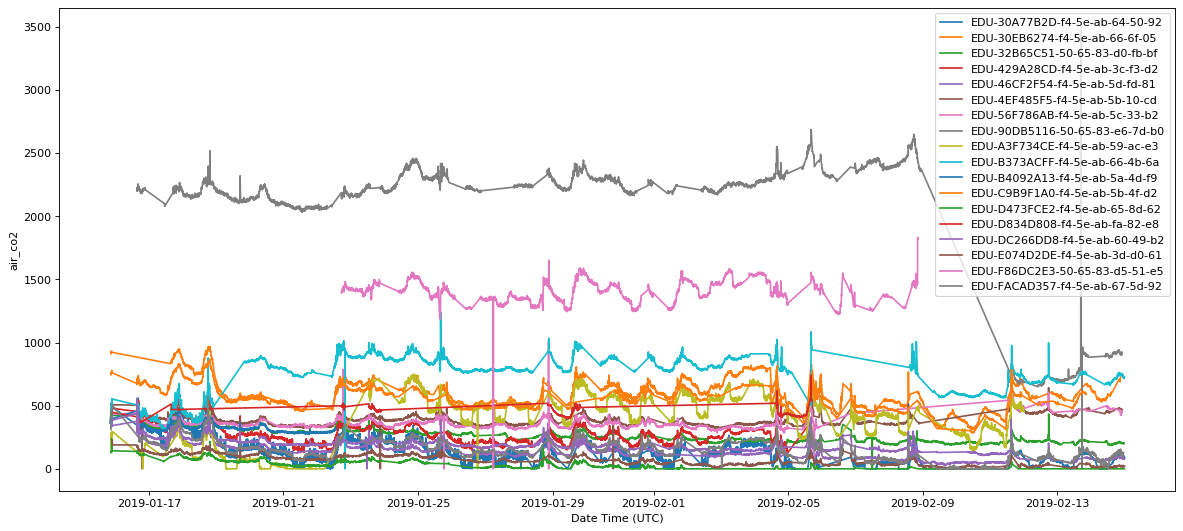

In [10]:
plotData("air_co2")

/Users/srmoore/Notebooks/pfc-20/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


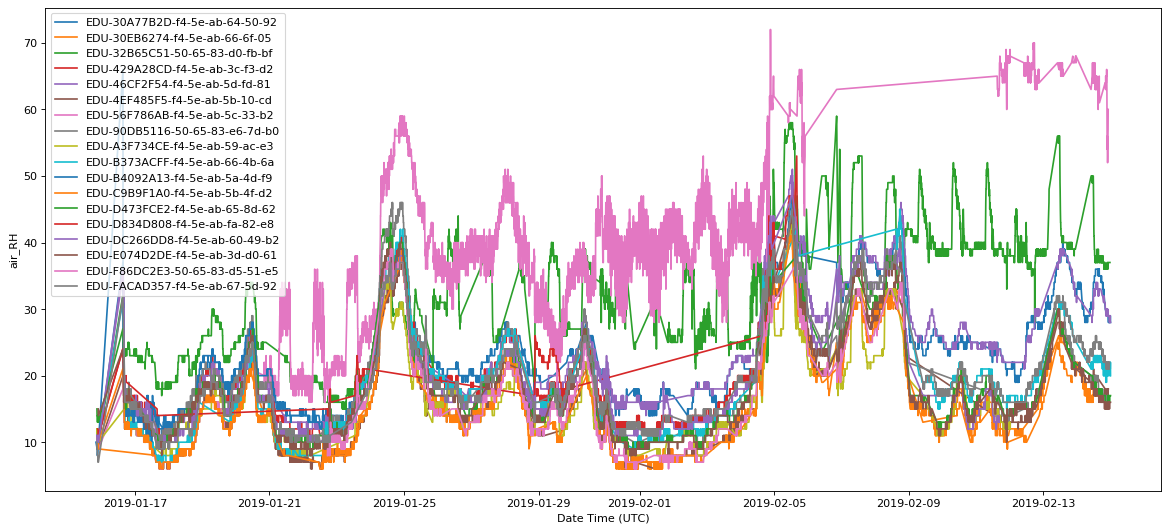

In [11]:
plotData("air_RH")

/Users/srmoore/Notebooks/pfc-20/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


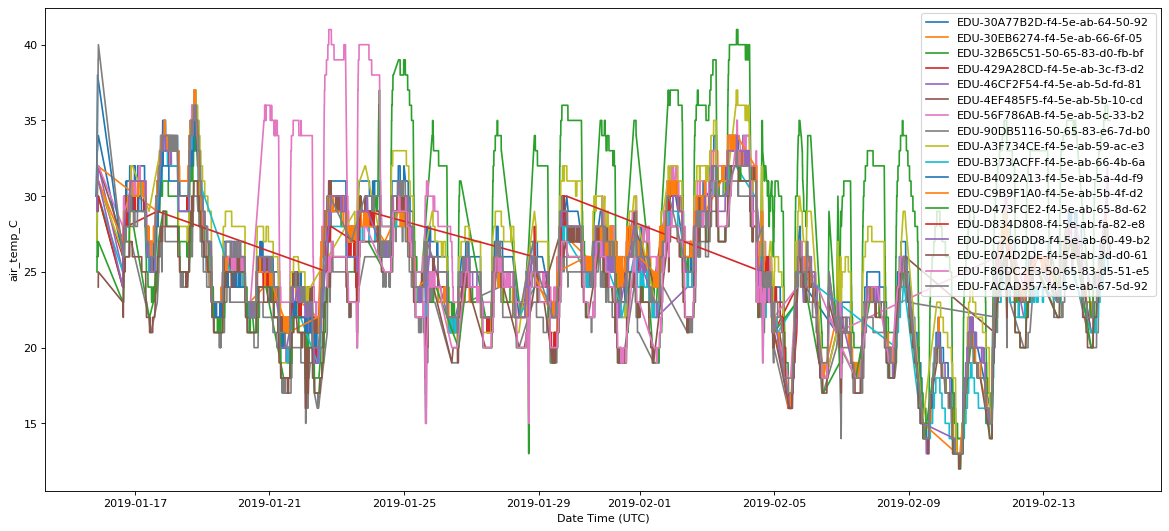

In [12]:
plotData("air_temp_C")

/Users/srmoore/Notebooks/pfc-20/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


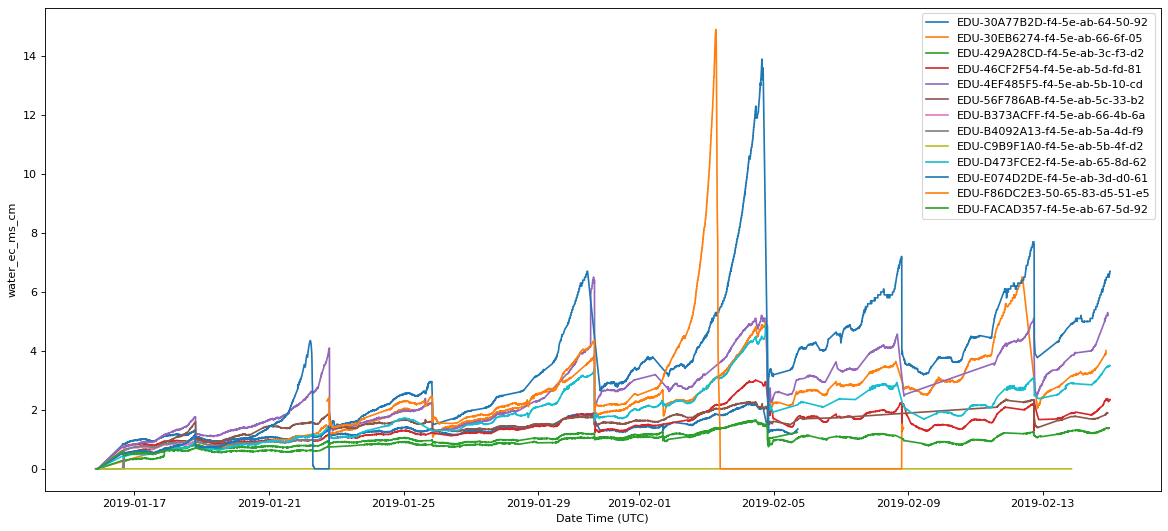

In [13]:
plotData("water_ec_ms_cm",removeSoil=True)

/Users/srmoore/Notebooks/pfc-20/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


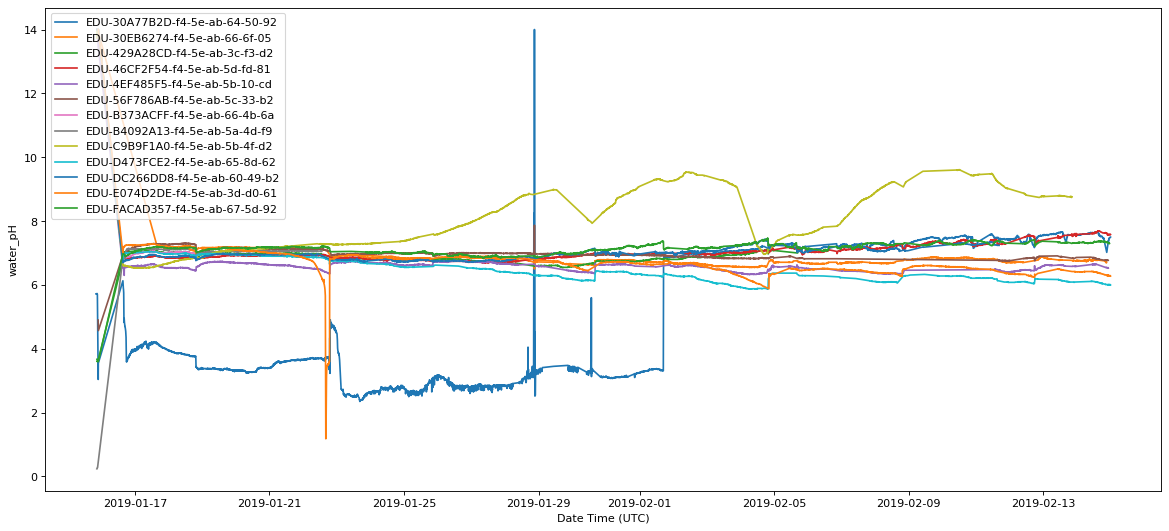

In [14]:
plotData("water_pH",removeSoil=True)

/Users/srmoore/Notebooks/pfc-20/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


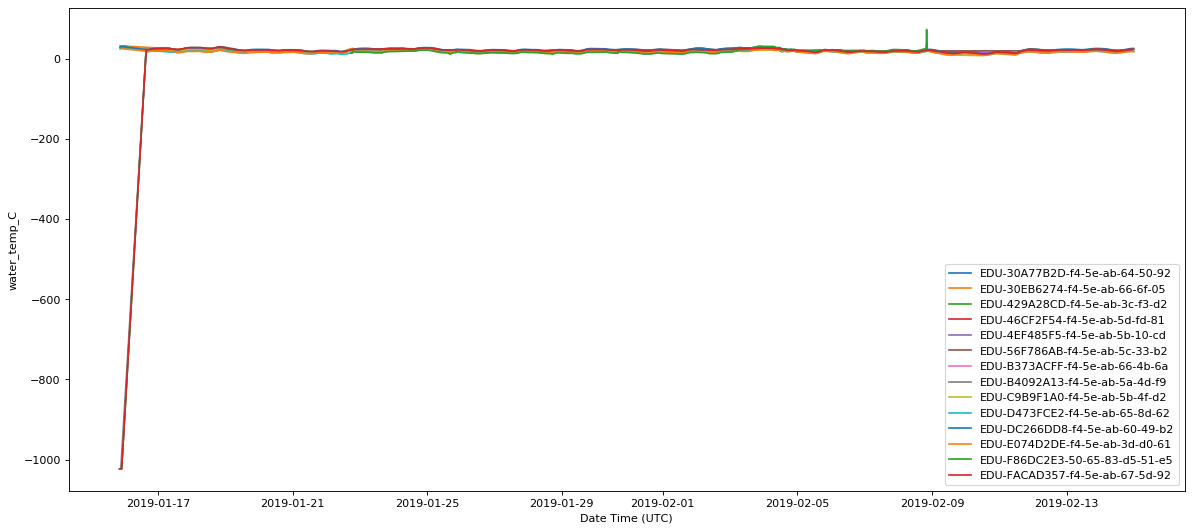

In [15]:
plotData("water_temp_C",removeSoil=True)